<a href="https://colab.research.google.com/github/awhitehouse1/DS4002-Project-1/blob/main/Scripts/Vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
pip install nltk

In [140]:
pip install vaderSentiment

In [141]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

In [142]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
# Load the CSV file into a DataFrame
df = pd.read_csv('amazon_reviews.csv')

In [144]:
# Drop unwanted columns
df = df.drop(columns=['score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'])

In [145]:
# Pre-process the 'reviewText' column
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [146]:
# Create new column by applying pre-process function to 'reviewText'
df['cleaned_reviewText'] = df['reviewText'].apply(lambda x: preprocess_text(str(x)))

In [147]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [148]:
# Apply sentiment analysis on the pre-processed 'cleaned_reviewText' column
df['sentiment_scores'] = df['cleaned_reviewText'].apply(lambda x: analyzer.polarity_scores(x))

In [149]:
# Extract the compound score as the overall sentiment score
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

In [150]:
# Display the first few rows of the processed DataFrame
print(df[['reviewerName', 'reviewText', 'cleaned_reviewText', 'compound_score']].head())

   reviewerName                                         reviewText  \
0           NaN                                         No issues.   
1          0mie  Purchased this for my device, it worked as adv...   
2           1K3  it works as expected. I should have sprung for...   
3           1m2  This think has worked out great.Had a diff. br...   
4  2&amp;1/2Men  Bought it with Retail Packaging, arrived legit...   

                                  cleaned_reviewText  compound_score  
0                                             issues          0.0000  
1  purchased device worked advertised never much ...          0.0000  
2  works expected sprung higher capacity think ma...          0.4019  
3  think worked greathad diff bran gb card went s...          0.6486  
4  bought retail packaging arrived legit orange e...          0.8591  


In [151]:
# Checking for correlation between compound score and overall rating
# Ensure 'overall' column is present in the dataframe and is numeric
df['overall'] = pd.to_numeric(df['overall'], errors='coerce')

In [152]:
pip install matplotlib seaborn

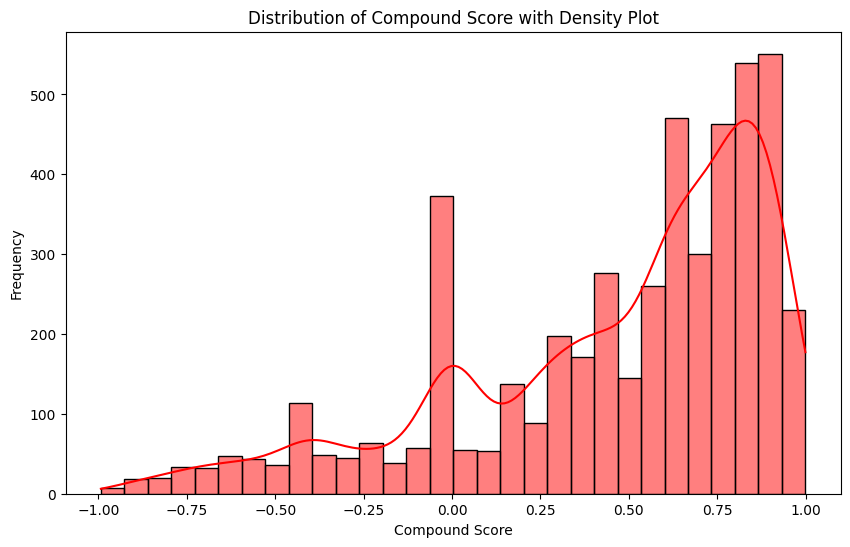

In [153]:
# Visualizing distribution of compound scores
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the histogram with a density line for the compound score
sns.histplot(df['compound_score'], kde=True, bins=30, color='red', edgecolor='black')

# Add labels and title
plt.title('Distribution of Compound Score with Density Plot')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [154]:
# Density plot shows a left skewed distribution with most of the compound scores falling between 0.50 and 1.00.
# This suggests that most of the reviews were positive.

In [155]:
# Correlation between 'compound_score' and 'overall'
correlation = df['compound_score'].corr(df['overall'])

In [156]:
print(f"The correlation between the compound score and the overall rating is: {correlation}")

The correlation between the compound score and the overall rating is: 0.3185488215615132


In [157]:
# The correlation is 0.3185, which is weaker than what we assumed to be.

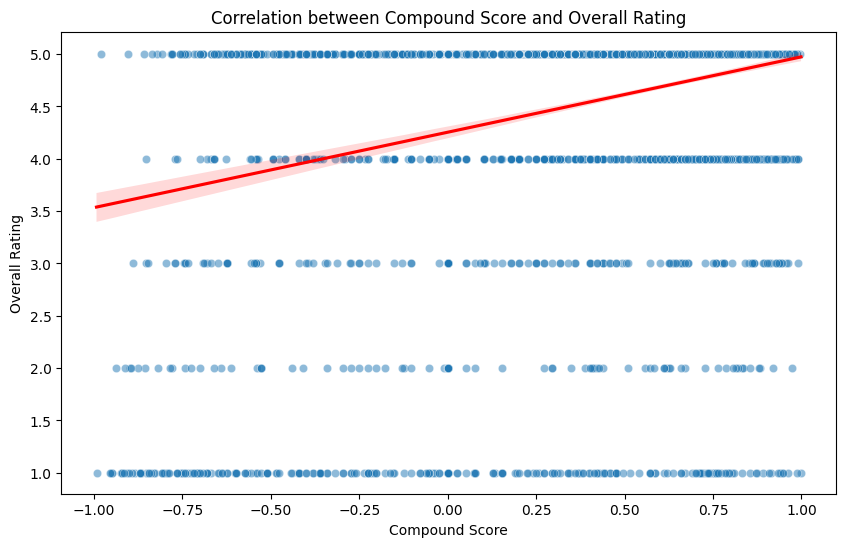

In [158]:
# Plot the correlation
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='compound_score', y='overall', data=df, alpha=0.5)

# Add a line of best fit
sns.regplot(x='compound_score', y='overall', data=df, scatter=False, color='red')

# Add labels and title
plt.title('Correlation between Compound Score and Overall Rating')
plt.xlabel('Compound Score')
plt.ylabel('Overall Rating')

plt.show()


In [159]:
# Above graph does not make much sense because overall (rating) is not a continuous variable.
# Because the compound scores are evenly distributed among each of the ratings, it is hard to interpret
# this graph and visualize the correlation.

<ipython-input-160-d2114f7ff068>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall', y='compound_score', data=df, palette= 'plasma')


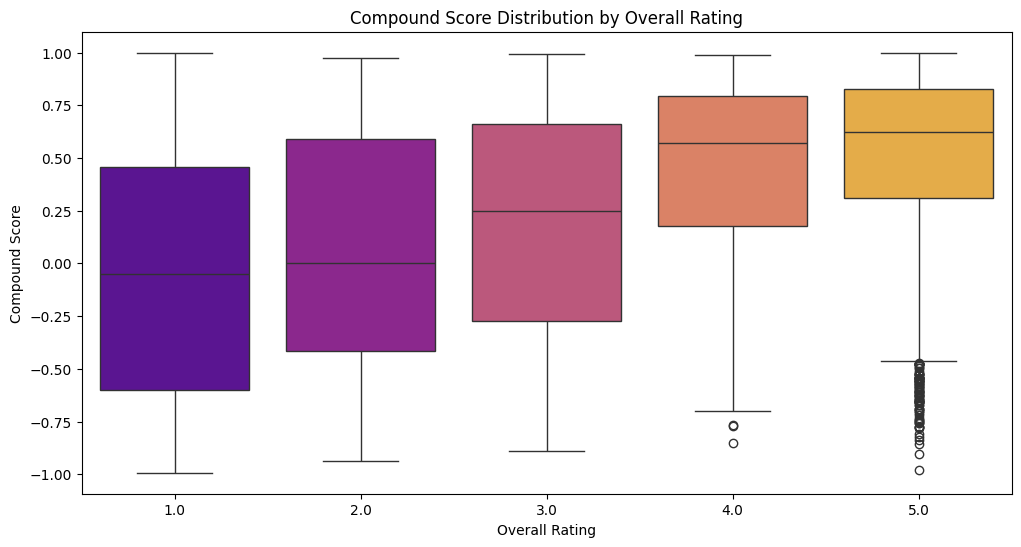

In [160]:
# Boxplot of compound Scores by overall rating
# Set up the figure
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(x='overall', y='compound_score', data=df, palette= 'plasma')

# Add labels and title
plt.title('Compound Score Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Score')

plt.show()


In [161]:
# On average, neutral compound scores (reviews) were given more to products with 1 and 2 star ratings.
# Median of the boxplots show that compound scores increase as overall ratings increase, which could indicate
# that products with higher ratings tend to have more positive reviews.
# However, there are outliers in the 4 and 5 star ratings with negative compound scores. This could be because of
# the difference in users' experiences of the product (defects, misuse, diverse user needs, etc) that can be
# explored further.

<ipython-input-162-fe068b6362bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='overall', y='compound_score', data=df, inner='box', palette='plasma')


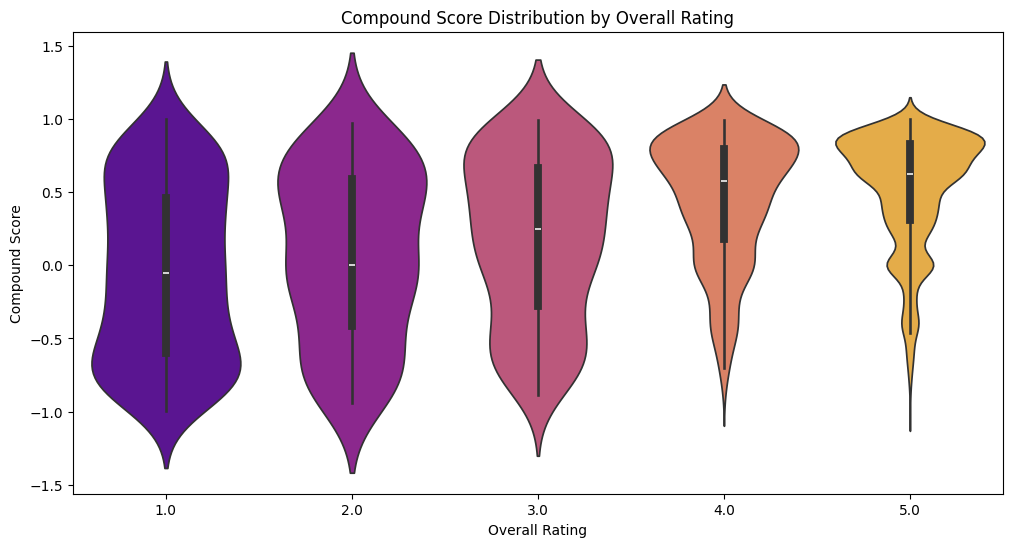

In [162]:
# Violin Plot of compound scores across overall ratings
# Set up the figure
plt.figure(figsize=(12, 6))

# Create a violin plot
sns.violinplot(x='overall', y='compound_score', data=df, inner='box', palette='plasma')

# Add labels and title
plt.title('Compound Score Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Score')

plt.show()


In [163]:
# Looking at the shapes of the violin plot, the 1 star ratings appear to have a fairly normal distribution
# of compound scores while 2 to 5 star ratings have skewed distributions of positive compound scores.
# Similar to the boxplots, compound scores seem to increase as ratings increase.
# We also see that there are outliers in 4 and 5 star ratings that are away from the rest of the distribution.

In [164]:
pip install joypy matplotlib pandas

<Figure size 1200x800 with 0 Axes>

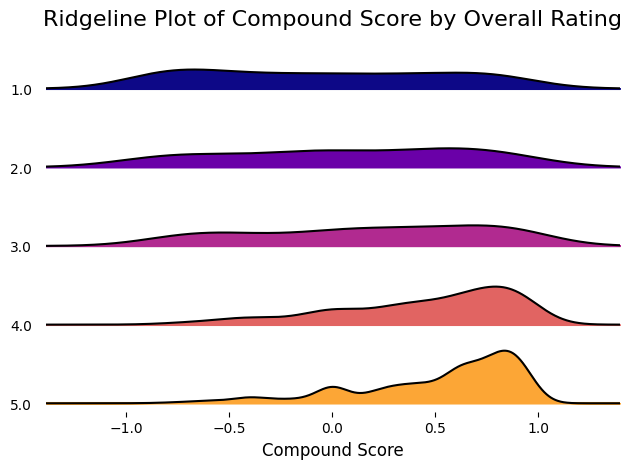

In [165]:
# Ridgeline plot of compound Score by overall rating
import joypy

# Create the ridgeline plot
plt.figure(figsize=(12, 8))
joypy.joyplot(df, by='overall', column='compound_score', colormap=plt.cm.plasma)

# Set labels and the title
plt.xlabel('Compound Score', fontsize=12)
plt.title('Ridgeline Plot of Compound Score by Overall Rating', fontsize=16)

plt.gca().set_yticks(range(len(df['overall'].unique())))
plt.gca().set_yticklabels(sorted(df['overall'].unique()), fontsize=12)
# Display the plot
plt.tight_layout()
plt.show()

In [166]:
# Compound scores of 1,2, and 3 star ratings seem to be evenly distributed, which is surprising because low
# product ratings are usually associated with low customer sentiment.
# Products with 4 and 5 stars have more positive compound scores, which is consistent with what we saw before.

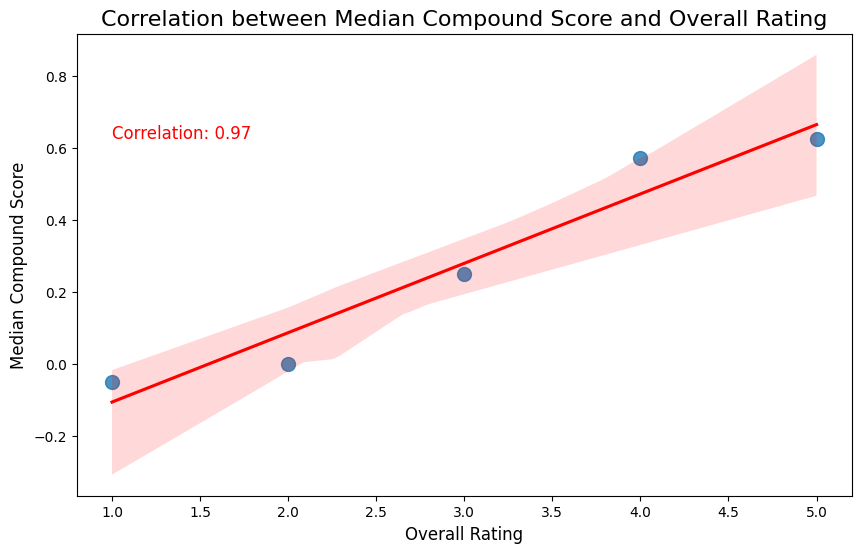

In [167]:
# Median compound scores and overall rating
from scipy.stats import pearsonr

# Calculate the median compound score for each overall rating
median_scores = df.groupby('overall')['compound_score'].median().reset_index()

# Calculate the correlation coefficient between overall rating and median compound score
correlation, _ = pearsonr(median_scores['overall'], median_scores['compound_score'])

# Create the scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x='overall', y='compound_score', data=median_scores, scatter_kws={'s': 100}, line_kws={"color": "red"})

# Add correlation value to the plot
plt.text(x=median_scores['overall'].min(),
         y=median_scores['compound_score'].max(),
         s=f'Correlation: {correlation:.2f}', fontsize=12, color='red')

# Add labels and title
plt.title('Correlation between Median Compound Score and Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Median Compound Score', fontsize=12)

plt.show()


In [168]:
# Graph above illustrates a stronge positive correlation between overall ratings and customer sentiment scores.
# Median is not influenced by outliers so this graph does not take into account variability of customer reviews.

In [169]:
pip install wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


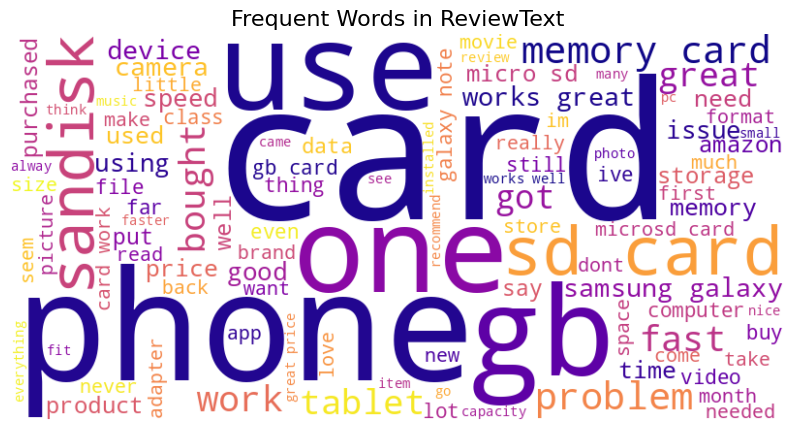

In [170]:
# Word cloud of words in ReviewText
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all reviews into a single string
all_reviews = ' '.join(df['reviewText'].dropna().astype(str))

# Pre-process the text: remove non-alphabetic characters, convert to lowercase, and remove stop words
processed_reviews = re.sub(r'[^a-zA-Z\s]', '', all_reviews).lower()
processed_reviews = ' '.join([word for word in processed_reviews.split() if word not in stop_words])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100,
                      colormap='plasma').generate(processed_reviews)

# Display
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Words in ReviewText', fontsize=16)
plt.show()


In [171]:
# Reviews closest to the median compound score for each overall rating
from collections import Counter

# Function to get top 10 words for a given list of reviews
def get_top_words(reviews):
    # Flatten the list of strings into a single list of words
    all_words = ' '.join(reviews).split()
    # Count the word frequencies
    word_freq = Counter(all_words)
    # Get the 10 most common words
    return word_freq.most_common(10)

# Get the top 10 words for each overall rating
top_words_by_rating = {}
for rating in sorted(df['overall'].unique()):
    reviews = df[df['overall'] == rating]['cleaned_reviewText'].dropna()
    top_words_by_rating[rating] = get_top_words(reviews)

print("Top 10 most frequent words for each overall rating:")
for rating, words in top_words_by_rating.items():
    print(f"Rating {rating}: {words}")


Top 10 most frequent words for each overall rating:
Rating 1.0: [('card', 604), ('sandisk', 202), ('phone', 168), ('gb', 138), ('one', 106), ('cards', 106), ('would', 95), ('sd', 93), ('months', 81), ('format', 77)]
Rating 2.0: [('card', 218), ('phone', 70), ('gb', 69), ('sandisk', 60), ('cards', 39), ('would', 37), ('class', 34), ('mbs', 33), ('speed', 33), ('memory', 31)]
Rating 3.0: [('card', 229), ('gb', 77), ('phone', 75), ('sandisk', 67), ('one', 48), ('cards', 43), ('would', 39), ('use', 38), ('works', 35), ('sd', 35)]
Rating 4.0: [('card', 575), ('phone', 210), ('gb', 184), ('works', 181), ('sd', 169), ('memory', 146), ('one', 142), ('good', 135), ('sandisk', 133), ('great', 131)]
Rating 5.0: [('card', 2977), ('works', 1307), ('gb', 1257), ('great', 1257), ('phone', 1162), ('memory', 1078), ('sd', 878), ('use', 868), ('sandisk', 824), ('galaxy', 779)]
